## Project: Sentiment Classifier & Analysis on Twitter Data
### Author: SANDHYA S
### Date: 28 January '21
### Course: Python Functions, Files and Dictionaries

### Description: 
We have provided some synthetic (fake, semi-randomly generated) twitter data in a csv file named project_twitter_data.csv which has the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet. We have also words that express positive sentiment and negative sentiment, in the files positive_words.txt and negative_words.txt.

Your task is to build a sentiment classifier, which will detect how positive or negative each tweet is. You will create a csv file, which contains columns for the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score for each tweet. At the end, you upload the csv file to Excel or Google Sheets, and produce a graph of the Net Score vs Number of Retweets.

## Part 1: Sentiment Classifier

In [1]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

def postitive_negative():
    positive_words = []
    with open("positive_words.txt") as pos_f:
        for lin in pos_f:
            lin.lower()
            if lin[0] != ';' and lin[0] != '\n':
                positive_words.append(lin.strip())
    negative_words = []
    with open("negative_words.txt") as pos_f:
        for lin in pos_f:
            lin.lower()
            if lin[0] != ';' and lin[0] != '\n':
                negative_words.append(lin.strip())
    return positive_words, negative_words

# Tweet_data in List
def File_list(file_data): 
    new_file = []
    file_data = file_data.strip().split("\n")
    for item in file_data:
        new_file.append(item.strip().split(","))
    new_file.remove(new_file[0])
    return new_file

# Removing punctuation characters from twitter data
def strip_punctuation(punc_str):     
    for char in punc_str:
        if char in punctuation_chars:
             punc_str = punc_str.replace(char, "")
        else:
            continue
    return punc_str

def Twitter_List():               
    fileR = open("project_twitter_data.csv", "r")
    file_data = fileR.read().lower()
    fileR.close()
    data_List = File_list(file_data)
    return data_List
        
# Counting the positive words in the file 
def get_pos(each_twt, pos_words):
    punc_data = strip_punctuation(each_twt)
    each_twt = punc_data.split(" ")
    num_pos = 0
    for word in each_twt:
        if word in pos_words:
             num_pos += 1
        else:
            continue
    return num_pos

# Counting the negative words in the file 
def get_neg(each_twt, neg_words):
    punc_data = strip_punctuation(each_twt)
    each_twt = punc_data.split(" ")
    num_neg= 0
    for word in each_twt:
        if word in neg_words:
             num_neg += 1
        else:
            continue
    return num_neg

# Analysis of Tweet data
def Tweet_Analysis(Twt_data):
    Twt_res = []
    pos, neg = postitive_negative()
    for each_tweet in Twt_data:
        v1 = int(each_tweet[1])
        v2 = int(each_tweet[2])
        v3 = get_pos(each_tweet[0], pos)
        v4 = get_neg(each_tweet[0], neg)
        Twt_res.append([v1, v2, v3, v4, v3 - v4])
    return Twt_res

def write_Resulting_data(final):
    outfile = open("resulting_data.csv", "w")
    outfile.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score')
    for item in final:
        outfile.write('\n')
        score = f'{item[0]}, {item[1]}, {item[2]}, {item[3]}, {item[4]}'
        outfile.write(score)
    outfile.write('\n')
    outfile.close()
    
    fileRd = open("resulting_data.csv", "r")
    file_d = fileRd.read()
    print(file_d)


Tweet_data = Twitter_List()
Tweet_Result = Tweet_Analysis(Tweet_data)
write_Resulting_data(Tweet_Result)

Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score
3, 0, 0, 0, 0
1, 0, 2, 2, 0
1, 2, 1, 0, 1
3, 1, 1, 0, 1
6, 0, 2, 0, 2
9, 5, 2, 0, 2
19, 0, 2, 0, 2
0, 0, 0, 3, -3
0, 0, 0, 2, -2
82, 2, 4, 0, 4
0, 0, 0, 1, -1
0, 0, 1, 0, 1
47, 0, 2, 0, 2
2, 1, 1, 0, 1
0, 2, 1, 0, 1
0, 0, 2, 1, 1
4, 6, 3, 0, 3
19, 0, 3, 1, 2
0, 0, 1, 1, 0



## Part 2: Sentiment Analysis

##### Graph of the Net Score vs Number of Retweets

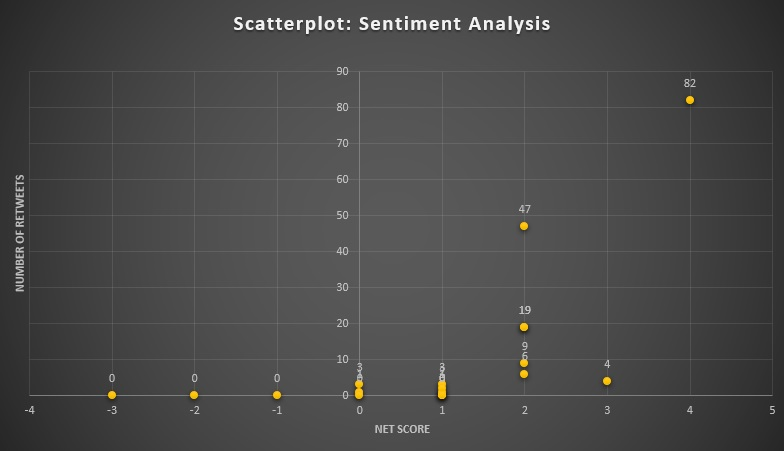

In [2]:
from IPython import display
display.Image('Graph_tweetAnalysis.png')

## Thank You! 